In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [11]:
customer = pd.read_csv('MCustomers.csv')

In [12]:
customer.head()

,CustomerID,Genre,Age,RevenuAnnuel-K$,Depense_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       200 non-null    int64 
 1   Genre            200 non-null    object
 2   Age              200 non-null    int64 
 3   RevenuAnnuel-K$  200 non-null    int64 
 4   Depense_1-100    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
customer = customer.drop('CustomerID', axis = 1)

In [15]:
customer.head()

,Genre,Age,RevenuAnnuel-K$,Depense_1-100
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
customer.describe()

,Age,RevenuAnnuel-K$,Depense_1-100
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [17]:
customer.corr()

,Age,RevenuAnnuel-K$,Depense_1-100
Age,1.000000,-0.012398,-0.327227
RevenuAnnuel-K$,-0.012398,1.000000,0.009903
Depense_1-100,-0.327227,0.009903,1.000000


<AxesSubplot:>

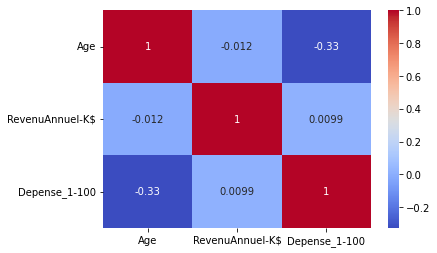

In [18]:
sns.heatmap(customer.corr(), annot = True, cmap = 'coolwarm')

In [19]:
data = customer.drop(['Age', 'Genre'], axis = 1)

In [20]:
data

,RevenuAnnuel-K$,Depense_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0, 0.5, 'Dépense (1-100)')

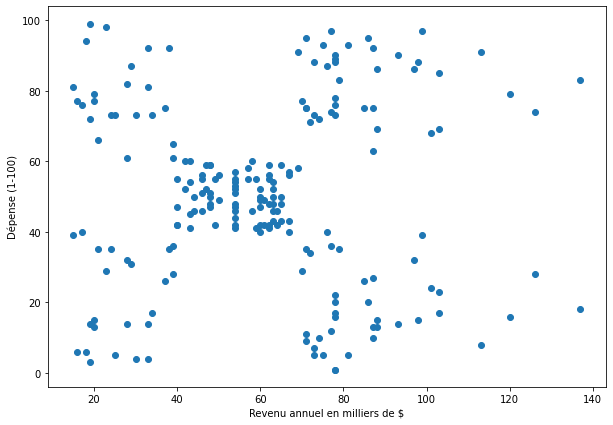

In [21]:
plt.figure(figsize = (10,7))
plt.scatter(x = 'RevenuAnnuel-K$', y ='Depense_1-100', data = data )
plt.xlabel("Revenu annuel en milliers de $")
plt.ylabel('Dépense (1-100)')

In [23]:
model = KMeans(n_clusters = 5)

In [24]:
model.fit(data)

KMeans(n_clusters=5)

In [25]:
centroides = model.cluster_centers_

In [26]:
centroides

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [27]:
labelsCentroides = model.labels_

In [28]:
labelsCentroides

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [29]:
data['labelsCentroides'] = labelsCentroides

In [30]:
data

,RevenuAnnuel-K$,Depense_1-100,labelsCentroides
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,3
197,126,74,2
198,137,18,3


<AxesSubplot:xlabel='RevenuAnnuel-K$', ylabel='Depense_1-100'>

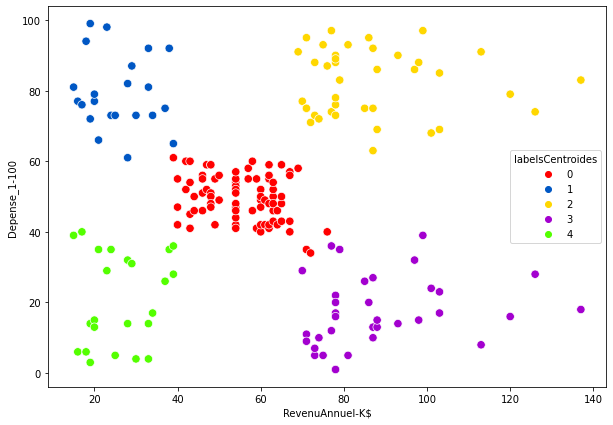

In [31]:
plt.figure(figsize = (10,7))
sns.scatterplot(x ='RevenuAnnuel-K$', y = 'Depense_1-100', hue = 'labelsCentroides',
               data = data, palette = 'prism', s = 70)

In [32]:
data['labelsCentroides'].value_counts()

0    81
2    39
3    35
4    23
1    22
Name: labelsCentroides, dtype: int64

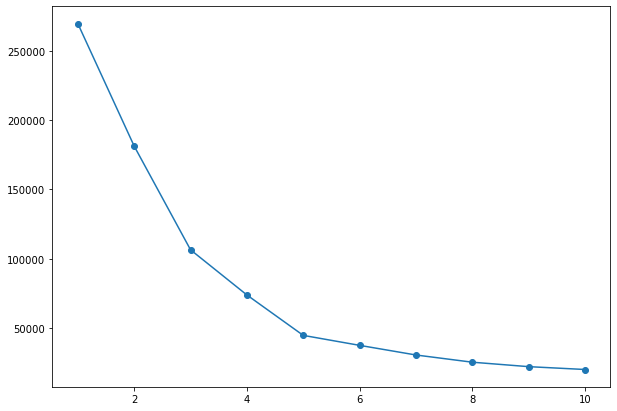

In [24]:
tab = []
for k in range(1,11):
    model = KMeans(n_clusters = k)
    model.fit(data.drop('labelsCentroides', axis = 1))
    tab.append(model.inertia_)
    
plt.figure(figsize = (10,7))
plt.plot(range(1,11), tab)
plt.scatter(range(1,11), tab)

In [34]:
df = customer[['Age', 'RevenuAnnuel-K$', 'Depense_1-100']]

In [35]:
df

,Age,RevenuAnnuel-K$,Depense_1-100
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [36]:
model1 = KMeans(n_clusters = 5)

In [37]:
model1.fit(df)

KMeans(n_clusters=5)

In [38]:
model1.cluster_centers_

array([[40.66666667, 87.75      , 17.58333333],
       [43.72727273, 55.48051948, 49.32467532],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [24.96      , 28.04      , 77.        ]])

In [39]:
labels = model1.labels_

In [40]:
labels

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [41]:
df['Labels'] = labels

In [42]:
df

,Age,RevenuAnnuel-K$,Depense_1-100,Labels
0,19,15,39,2
1,21,15,81,4
2,20,16,6,2
3,23,16,77,4
4,31,17,40,2
...,...,...,...,...
195,35,120,79,3
196,45,126,28,0
197,32,126,74,3
198,32,137,18,0


In [53]:
%matplotlib
plt.figure(figsize = (10,7))
ax = plt.axes(projection = '3d')
ax.scatter3D(df['Age'], df['RevenuAnnuel-K$'], df['Depense_1-100'], c = labels, s = 70)
ax.set_xlabel('Age')
ax.set_ylabel('Revenu annuel')
ax.set_zlabel('Dépenses')

Using matplotlib backend: MacOSX


Text(0.5, 0, 'Dépenses')